In [35]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [36]:
def load_data_from_json(filename):
    tmp = {}
    
    with open(filename) as file:
        tmp = json.load(file)
        
    index = pd.date_range(
        start=tmp["t0"], 
        freq=tmp["freq"], 
        periods=tmp["length"])
    tmp["data"] = pd.Series(
        data=tmp["data"], 
        index=index)
        
    return tmp

In [37]:
time_series_data = load_data_from_json(
    "tmp/all.json"
)
time_series_data

{'freq': 'H',
 't0': '2020-01-01 00:00:00',
 'length': 500,
 'data': 2020-01-01 00:00:00    -118.520821
 2020-01-01 01:00:00    -121.417558
 2020-01-01 02:00:00    -113.624594
 2020-01-01 03:00:00    -197.074225
 2020-01-01 04:00:00      11.191463
                           ...     
 2020-01-21 15:00:00    1732.537542
 2020-01-21 16:00:00    1675.656558
 2020-01-21 17:00:00    1684.402002
 2020-01-21 18:00:00    1844.359636
 2020-01-21 19:00:00    2092.252685
 Freq: H, Length: 500, dtype: float64}

In [38]:
def train_test_split(data, ratio=0.9):
    train_length = int(len(data) * ratio)
    pl = int(len(data)) - train_length
    prediction_length = pl
    training_dataset = data[:-prediction_length]
    target_dataset = data[train_length-1:]
    test_dataset = data
    
    return {
        "prediction_length": prediction_length,
        "training_dataset": training_dataset,
        "target_dataset": target_dataset,
        "test_dataset": test_dataset
    }

In [39]:
results = train_test_split(
    time_series_data["data"]
)
print(results["prediction_length"])

50


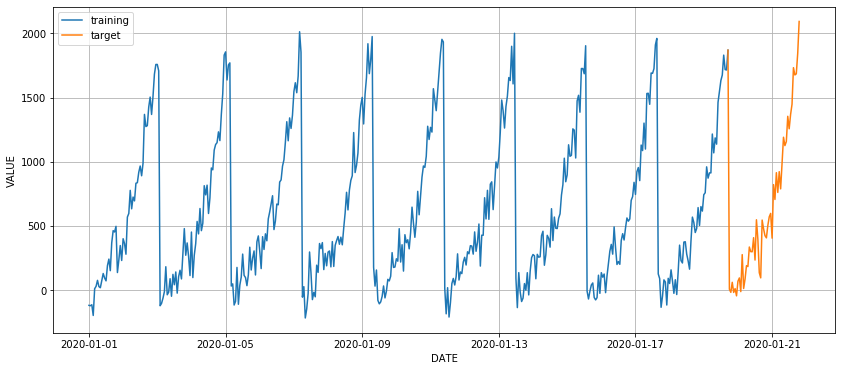

In [40]:
training_dataset = results["training_dataset"]
target_dataset = results["target_dataset"]

plt.figure(figsize=(14,6))
plt.plot(training_dataset.index, 
         training_dataset, label="training")
plt.plot(target_dataset.index, 
         target_dataset, 
         label="target")
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("VALUE")    
plt.legend()
plt.show()

In [41]:
def series_to_object(data):
    return {"start": str(data.index[0]), 
            "target": list(data)}

In [42]:
def series_to_jsonline(data):
    return json.dumps(series_to_object(data))

In [43]:
def save_data_to_jsonlines(data, filename):
    tmp = {}
    
    with open(filename, 'wb') as file:
        t = series_to_jsonline(data)
        t = t.encode("utf-8")
        file.write(t)
        file.write("\n".encode("utf-8"))

In [44]:
save_data_to_jsonlines(
    results["training_dataset"], 
    "tmp/training.jsonl"
)
save_data_to_jsonlines(
    results["test_dataset"], 
    "tmp/test.jsonl"
)

In [45]:
s3_bucket = 'sagemaker-cookbook-bucket'
prefix = 'chapter08'

In [46]:
!aws s3 cp tmp/training.jsonl s3://{s3_bucket}/{prefix}/input/training.jsonl
!aws s3 cp tmp/test.jsonl s3://{s3_bucket}/{prefix}/input/test.jsonl


upload: tmp/training.jsonl to s3://sagemaker-cookbook-bucket/chapter08/input/training.jsonl
upload: tmp/test.jsonl to s3://sagemaker-cookbook-bucket/chapter08/input/test.jsonl


In [47]:
prediction_length = results["prediction_length"]
%store prediction_length

Stored 'prediction_length' (int)


In [48]:
freq = time_series_data["freq"]
%store freq

Stored 'freq' (str)


In [49]:
training_dataset = results["training_dataset"]
%store training_dataset
training_dataset

Stored 'training_dataset' (Series)


2020-01-01 00:00:00    -118.520821
2020-01-01 01:00:00    -121.417558
2020-01-01 02:00:00    -113.624594
2020-01-01 03:00:00    -197.074225
2020-01-01 04:00:00      11.191463
                          ...     
2020-01-19 13:00:00    1675.098326
2020-01-19 14:00:00    1830.164759
2020-01-19 15:00:00    1717.529411
2020-01-19 16:00:00    1714.456715
2020-01-19 17:00:00    1868.780563
Freq: H, Length: 450, dtype: float64

In [50]:
target_dataset = results["target_dataset"]
%store target_dataset
target_dataset

Stored 'target_dataset' (Series)


2020-01-19 17:00:00    1868.780563
2020-01-19 18:00:00       7.224860
2020-01-19 19:00:00     -17.103169
2020-01-19 20:00:00      61.009508
2020-01-19 21:00:00     -17.969486
2020-01-19 22:00:00      11.795133
2020-01-19 23:00:00     -44.306254
2020-01-20 00:00:00      69.532034
2020-01-20 01:00:00      95.094393
2020-01-20 02:00:00     -11.397955
2020-01-20 03:00:00     276.598187
2020-01-20 04:00:00      12.886059
2020-01-20 05:00:00      86.881715
2020-01-20 06:00:00     191.024101
2020-01-20 07:00:00     183.474253
2020-01-20 08:00:00     335.806032
2020-01-20 09:00:00     299.911152
2020-01-20 10:00:00     298.873756
2020-01-20 11:00:00     408.490700
2020-01-20 12:00:00     234.389273
2020-01-20 13:00:00     547.971711
2020-01-20 14:00:00     396.082897
2020-01-20 15:00:00     135.583027
2020-01-20 16:00:00      95.718737
2020-01-20 17:00:00     545.562297
2020-01-20 18:00:00     477.858150
2020-01-20 19:00:00     424.441117
2020-01-20 20:00:00     407.113235
2020-01-20 21:00:00 

In [51]:
%store s3_bucket
%store prefix

Stored 's3_bucket' (str)
Stored 'prefix' (str)
